### Random Forests 

**OBJECTIVES**

- Use `RandomForestClassifier` to extend Decision Tree models
- Compare models in a business use case and select model that optimizes expected profit

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

### Ensemble of Trees

```A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.```

In [51]:
data = load_breast_cancer(as_frame = True).frame
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [42]:
forest = [DecisionTreeClassifier(max_depth = 1) for i in range(10)]

In [43]:
X = data.iloc[:, :-1]
y = data['target']

In [47]:
preds = []
#loop over each tree
for tree in forest:
    #sample features
    X_in = X.sample(n = 5, axis = 1, )
    #build tree on subset
    tree.fit(X_in, y)
    #make predictions
    preds.append(tree.predict(X_in))

In [49]:
[preds[i][10] for i in range(10)]

[1, 1, 1, 0, 0, 1, 0, 1, 0, 0]

In [52]:
#instantiate
forest = RandomForestClassifier()

In [53]:
#fit 
forest.fit(X, y)

RandomForestClassifier()

In [54]:
#predict
forest.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Marketing Problem

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. [link](https://archive.ics.uci.edu/dataset/222/bank+marketing)

You have been tasked with finding a model for identifying further targets to offer incentive.  To do so, compare a Logistic Regression and Random Forest model to select the model that maximizes expected profit using the following cost benefit information:

- The cost of calling each customer is 2 dollars.
- A customer who purchases the product gives a profit of 200 dollars.


Recall the expected profit is found by:


$$\text{Expected Profit} = p(Y,p)*b(Y, p) + p(N, p)*b(N,p) + p(N,n)*b(N,n) + p(Y,n)*b(Y,n)$$


In [55]:
bank_marketing = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/bank.csv')

In [56]:
bank_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [57]:
bank_marketing.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64

In [66]:
X = bank_marketing[['age', 'balance', 'duration']]
y = bank_marketing['target']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lgr = LogisticRegression().fit(X_train, y_train)
forest = RandomForestClassifier().fit(X_train, y_train)

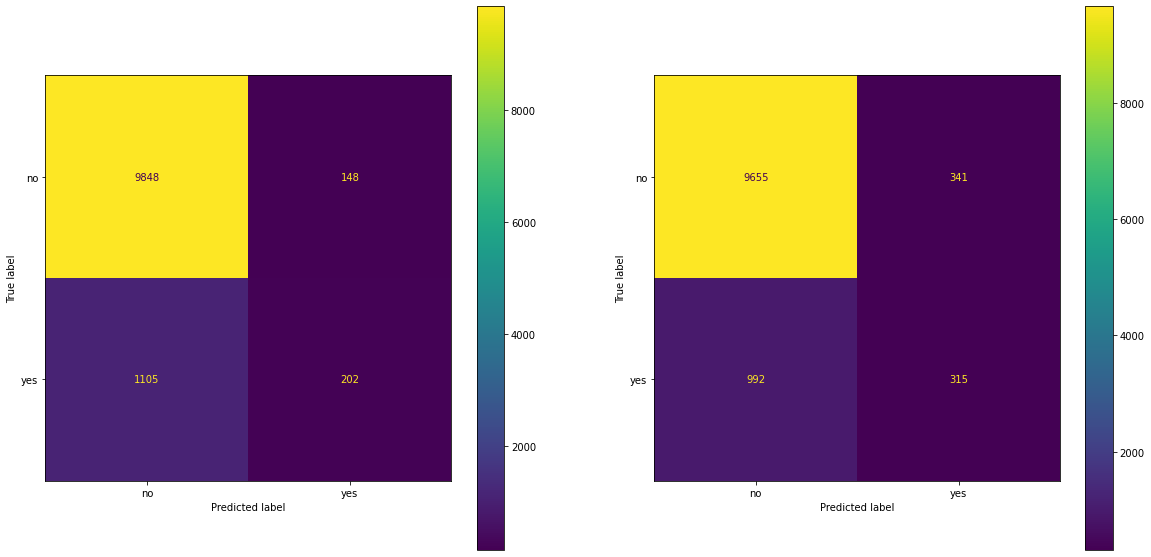

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, ax = ax[1])

In [74]:
cost_benefit = np.array([[0, -2], [0, 198]])

In [75]:
lgr_cmat = ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, ax = ax[0])

In [78]:
(lgr_cmat.confusion_matrix/lgr_cmat.confusion_matrix.sum()*cost_benefit).sum()

3.512341856144387

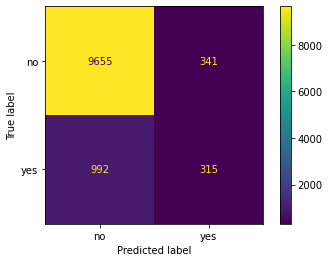

In [79]:
forest_cmat = ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test)

In [81]:
forest_cmat.confusion_matrix/forest_cmat.confusion_matrix.sum()

array([[0.854198  , 0.03016898],
       [0.08776431, 0.02786871]])

In [80]:
(forest_cmat.confusion_matrix/forest_cmat.confusion_matrix.sum()*cost_benefit).sum()

5.457666106343449

### Summary

Please complete the form [here](https://forms.gle/RTDS3GP5SAoJtey88) to summarize your groups work and solutions.